In [34]:
import cv2
import numpy as np


In [35]:
capture = cv2.VideoCapture(0)
while True:
    _, frame = capture.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    
    
        
    #displaying cam
    
    cv2.imshow("Frame", frame)
    
    laplacian = cv2.Laplacian(frame, cv2.CV_64F)
    #edges
    edges = cv2.Canny(frame, 100,200)
    
    cv2.imshow("Edges", laplacian)
    cv2.imshow("canny edges", edges)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()
capture.release()
    
    
    

In [2]:
# image detection
img1 = cv2.imread("C:\\Nitin\\studies and notes\\cv\\IMG_1063.JPG")
img2 = cv2.imread("C:\\Nitin\\studies and notes\\cv\\IMG_1063_crop.JPG",0)


In [3]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


In [4]:
w,h = img2.shape[::-1]

In [11]:
res = cv2.matchTemplate(img1_gray, img2, cv2.TM_CCOEFF_NORMED)
threshold = 0.7
loc = np.where(res>=threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img1, pt, (pt[0]+w , pt[1]+h), (0,255,255), 2)
    
    
cv2.imshow("test", img1)
cv2.waitKey(1000000)
cv2.destroyAllWindows()
    


In [7]:
import cv2
import numpy as np

img_rgb = cv2.imread("C:\\Nitin\\studies and notes\\cv\\test1.JPG")
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('C:\\Nitin\\studies and notes\\cv\\test1_crop.JPG',0)

#template = cv2.imread('C:\\Nitin\\studies and notes\\cv\\IMG_1063_crop.JPG',0)

w, h = template.shape[::-1]

In [8]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where( res >= threshold)

In [9]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('Detected',img_rgb)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [10]:
#grabcut foreground extraction 

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [22]:
img = cv2.imread("C:\\Nitin\\studies and notes\\cv\\test1.JPG")

In [23]:
img.shape

(959, 1280, 3)

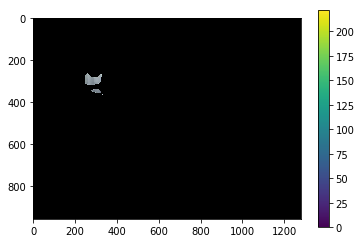

In [24]:
mask = np.zeros(img.shape[:2], np.uint8)
bgdmodel = np.zeros((1,65), np.float64)
fgdmodel = np.zeros((1,65), np.float64)

rectangle = (250, 250,150,150)

cv2.grabCut(img, mask, rectangle,bgdmodel, fgdmodel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask ==2) | (mask==0), 0,1).astype('uint8')

img = img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.colorbar()

plt.show()

In [1]:
# corner detaction from opncv2

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [10]:
img = cv2.imread("C:\\Nitin\\studies and notes\\cv\\test1.JPG")

In [11]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [12]:
img_gray = np.float32(img_gray)

In [13]:
corners = cv2.goodFeaturesToTrack(img_gray, 100,0.01,10)
corners = np.int0(corners)


for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img,(x,y),3,255, -1)
cv2.imshow('corner', img)

cv2.waitKey(10000)
cv2.destroyAllWindows()

In [20]:
# feature matching homograpghy

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [22]:
img1 = cv2.imread("C:\\Nitin\\studies and notes\\cv\\pillowplustoy.JPG",0)
img2 = cv2.imread("C:\\Nitin\\studies and notes\\cv\\pillow.JPG",0)

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)  #keypoints and descriptions
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

matches = bf.match(des1, des2)

matches = sorted(matches,key=lambda x: x.distance)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags = 2)

cv2.imshow("test",img3)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# back ground reduction for motion pictures

import cv2
import numpy as np
import matplotlib.pyplot as plt


cap = cv2.VideoCapture(0)
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    
    cv2.imshow("Original", frame)
    cv2.imshow("Foreground", fgmask)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()
    
    
    
    

In [1]:
# haar cascade object detection -face and eye detection
import cv2
import numpy as np
import matplotlib.pyplot as plt

#link1 = "https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier("C:\\Nitin\\studies and notes\\cv\\haarcascade_frontalface_default.xml")
#link2 = "https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml"
eye_cascade = cv2.CascadeClassifier("C:\\Nitin\studies and notes\\cv\\haarcascade_eye.xml")


cap = cv2.VideoCapture(0)

while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y),(x+w,y+h), (255,0,0), 2)
        
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh), (0,255,0), 2)
            
            
    cv2.imshow("Image", img)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()
    
    
    
            
        
        
